2023F Kelompok 9 :
- Muhammad Ariq Hibatullah (23031554064)
- Firdaini Azmi (23031554071)
- Farah Raina Febiana (23031554132)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Dataset Gizi.csv")

# 1) Exploratory Data Analysis

### Kondisi umum

Memeriksa jumlah data dan fitur, serta memeriksa tipe data apakah sudah sesuai atau belum.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nama         349 non-null    object
 1   Karbohidrat  349 non-null    object
 2   Protein      349 non-null    object
 3   kalori       349 non-null    object
 4   Lemak        349 non-null    object
 5   Energi       349 non-null    object
 6   lemak jenuh  349 non-null    object
 7   kolestrol    349 non-null    object
 8   serat        349 non-null    object
 9   gula         349 non-null    object
 10  sodium       349 non-null    object
 11  kalium       349 non-null    object
 12  berat        349 non-null    object
dtypes: object(13)
memory usage: 35.6+ KB


Terdapat sebanyak 349 data dan 12 fitur, belum termasuk fitur target karena dataset merupakan unsupervised. Bisa dilihat juga bahwa data masih bertipe object semua yang seharusnya adalah bertipe float.

### Missing value

Sebelum menghitung jumlah missing valuenya, perlu mengubah semua strip menjadi missing value terlebih dahulu.<br>karena saat scraping missing value diisi dengan tanda "-".

In [ ]:
df = df.replace("-", np.nan)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Nama            0
Karbohidrat     0
Protein         0
kalori          0
Lemak           0
Energi          0
lemak jenuh     0
kolestrol       1
serat           6
gula           16
sodium          0
kalium          2
berat           0
dtype: int64


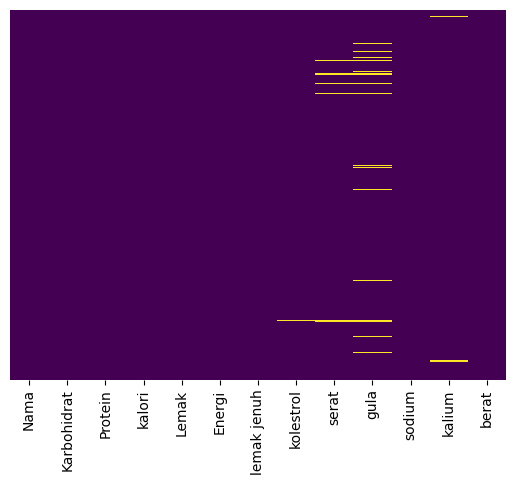

In [ ]:
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()

Terdapat sebanyak 25 missing value dan distribusinya merupakan MAR sehingga bisa diimputasi menggunakan KNN Imputer.

# 2) Preprocessing

## Data Cleaning

Data cleaning :

1.   Inconsisten data -> ubah tipe ke yg sesuai.
2.   Missing data -> mengatasi data yang hilang.
3.   Data duplikat -> mengatasi data duplikat.

### Drop data yang tidak digunakan

Menghapus data yang tidak berskala 100 gram, dan menghapus fitur berat.

In [ ]:
df = df[df['berat'] == "100 gram (g)"]
df.drop(columns=['berat'], inplace=True)

<ipython-input-7-caebf5acc860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['berat'], inplace=True)


### Menghapus semua huruf pada fitur numerik

Menghapus semua tulisan seperti g, mg, dan kkal yang ada pada data.

In [ ]:
kolom_eksklusif = 'Nama'

for kol in df.columns:
    if kol != kolom_eksklusif:
        df[kol] = df[kol].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)

### Menyesuaikan tipe data

Mengubah tipe data pada fitur numerik yang awalnya object menjadi float.

In [ ]:
df = df.replace("", np.nan)

In [ ]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Nama':
        df[col] = df[col].astype(float)

### Data duplikat

Memeriksa apakah terdapat data duplikat dalam dataset.

In [ ]:
df.duplicated().sum()

np.int64(19)

Bisa dilihat bahwa terdapat sebanyak 19 data duplikat, data tersebut selanjutnya akan dihapus.

In [ ]:
df = df.drop_duplicates()

### KNN Imputer

Setelah semua data sudah diproses dan dataset sudah clean, maka bisa dilanjutkan dengan menggunakan KNN Imputer untuk mengisi missing value berdasarkan data yang paling mirip.

In [ ]:
from sklearn.impute import KNNImputer

kolom_eksklusif = ['Nama']
df_no_impute = df[kolom_eksklusif]
df_impute = df.drop(columns=kolom_eksklusif)

imputer = KNNImputer(n_neighbors=3)
imputed_array = imputer.fit_transform(df_impute)
imputed_array = imputed_array.round(2)

df_imputed = pd.DataFrame(imputed_array, columns=df_impute.columns)
df_imputed = pd.concat([df_no_impute.reset_index(drop=True), df_imputed], axis=1)

In [ ]:
missing_values = df_imputed.isnull().sum()
print(missing_values)

Nama           0
Karbohidrat    0
Protein        0
kalori         0
Lemak          0
Energi         0
lemak jenuh    0
kolestrol      0
serat          0
gula           0
sodium         0
kalium         0
dtype: int64


Dari hasil tersebut, bisa diketahui bahwa tidak ada lagi missing value saat dilakukan KNN Imputer.

In [ ]:
df_nama = df_imputed[['Nama']]
df_imputed.drop(columns=['Nama'], inplace=True)

## Data Transforming

Data Transforming :

1.   Encoding -> buat fitur kategori.
2.   Normalisasi -> buat fitur numerik.

### Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# 3) Exploratory Data Analysis (post cleaning)

## Distribusi fitur
Memeriksa distribusi fitur setelah dilakuakan KNN Imputer.

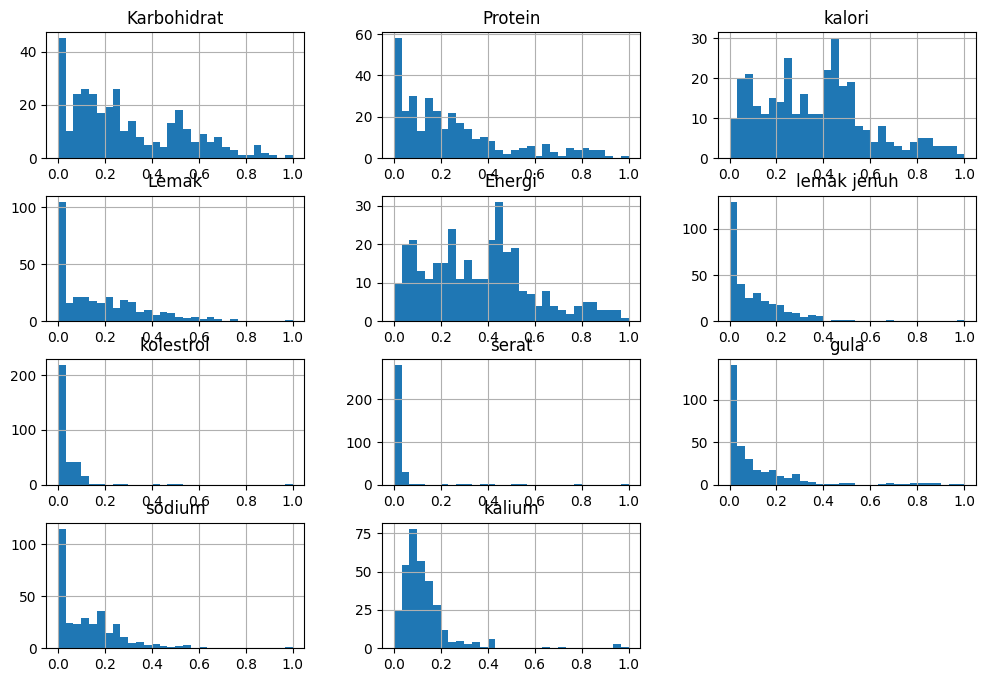

In [ ]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

## Korelasi fitur
Setelah semua data memiliki nilai lengkap, maka akan diperiksa korelasi antar fitur.

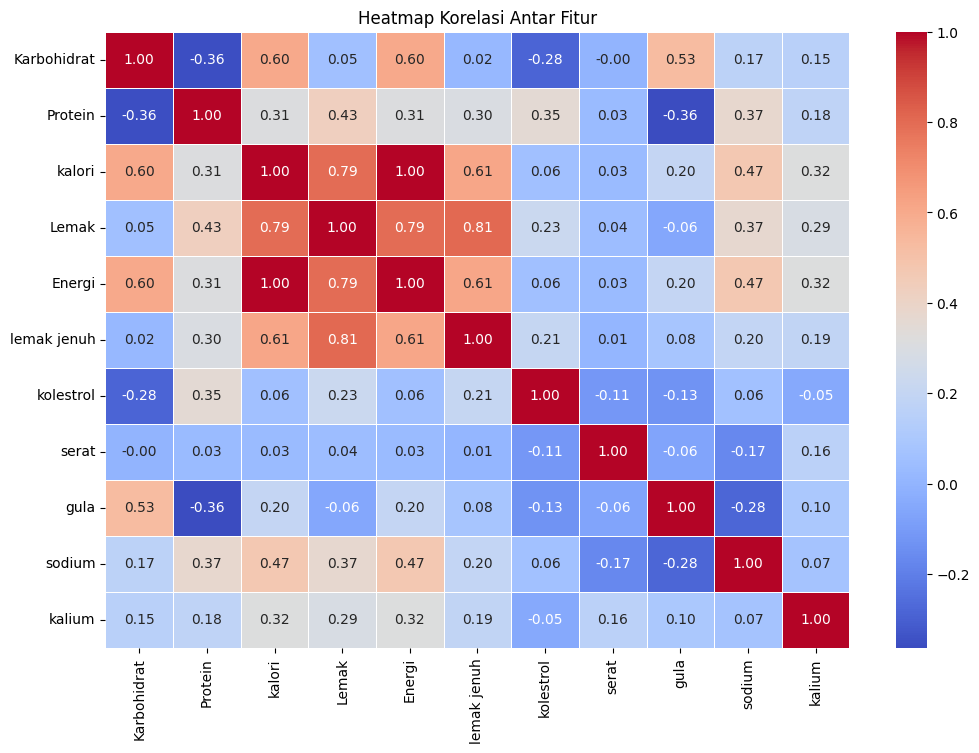

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Dapat dilihat bahwa ternyata fitur kalori dan energi sangat berkorelasi tinggi, sehingga bisa memilih salah satu dari kedua fitur tersebut untuk digunakan selanjutnya.

## Outlier
Memeriksa apakah terdapat outlier pada data yang dimiliki.

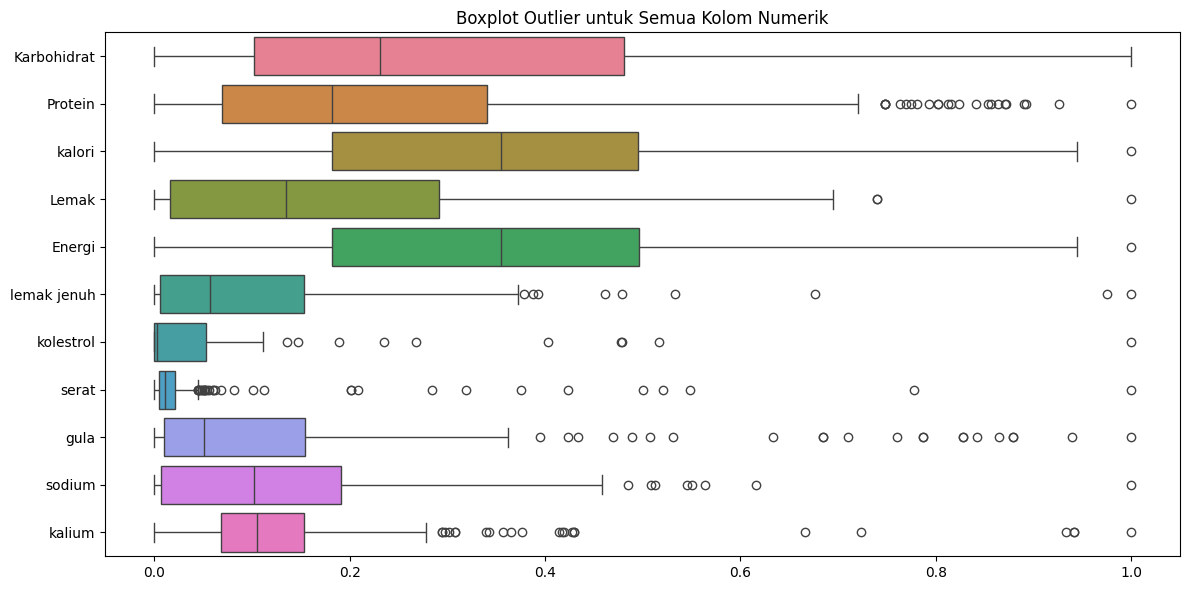

In [ ]:
df_numerik = df.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numerik, orient='h')  # orientasi horizontal agar lebih mudah dibaca
plt.title('Boxplot Outlier untuk Semua Kolom Numerik')
plt.tight_layout()
plt.show()

Terdapat banyak sekali outlier pada fitur serat dan kalium. Tapi setelah diperiksa, data tersebut bukanlah outlier, melainkan data dengan nilai ekstrim yang data tersebut benar adanya. Jadi data bisa dilanjutkan ke proses selanjutnya.

# 4) Modeling
Membangun model clustering menggunakan algortima K-means, DBSCAN, Hierarchi, dan GMM yang nanti akan dihitung metrik evalausinya dan akan diambil algoritma dengan performa terbaik.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

## K-Means

### Menentukan jumlah cluster

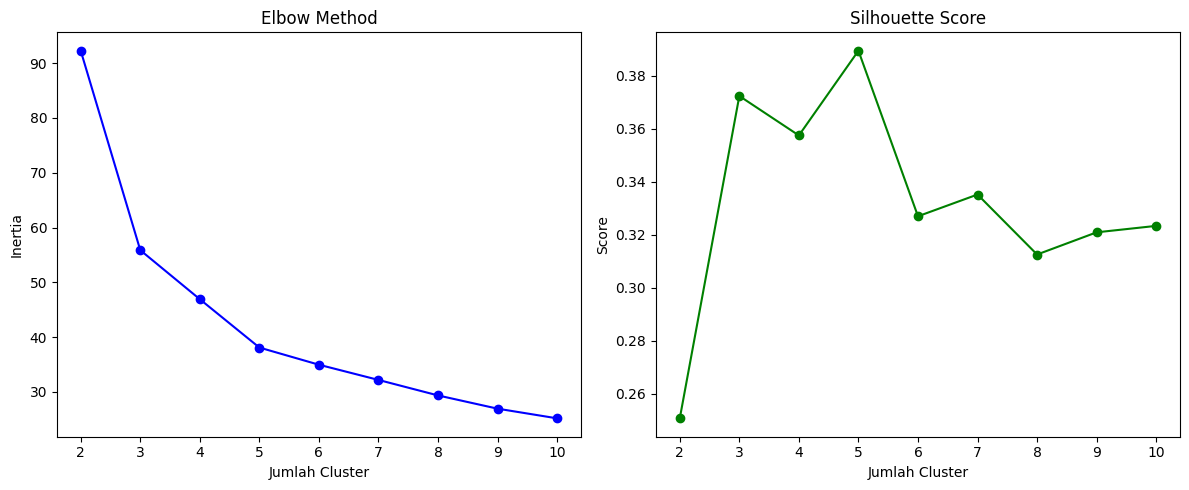

In [ ]:
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'go-')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Pada visualisasi tersebut, dapat diketahui bawah nilai k yang optimal adalah lima (k = 5) dengan nilai Silhouette Score paling tinggi.

### Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

sil_kmeans = silhouette_score(df, df['cluster'])
dbi_kmeans = davies_bouldin_score(df, df['cluster'])
chi_kmeans = calinski_harabasz_score(df, df['cluster'])

print(f"Silhouette Score: {sil_kmeans:.3f}")
print(f"Davies-Bouldin Index: {dbi_kmeans:.3f}")
print(f"Calinski-Harabasz Score: {chi_kmeans:.3f}\n")

Silhouette Score: 0.676
Davies-Bouldin Index: 0.543
Calinski-Harabasz Score: 1231.517



### Visualisasi

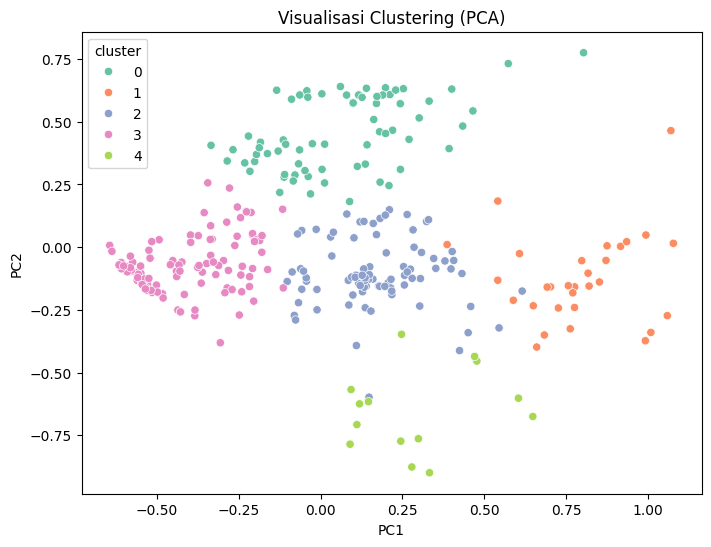

In [ ]:
pca =  PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['cluster']))

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title("Visualisasi Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## DBSCAN

### Menentukan nilai epsilon

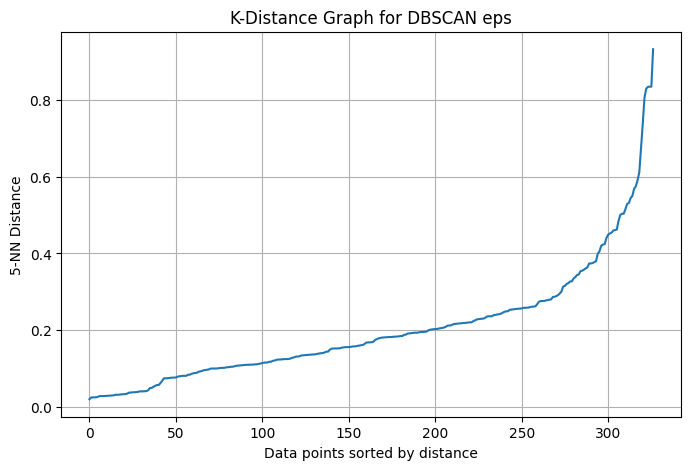

In [ ]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)

distances, indices = neighbors_fit.kneighbors(df)
k_distances = np.sort(distances[:, k - 1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f'{k}-NN Distance')
plt.xlabel('Data points sorted by distance')
plt.title('K-Distance Graph for DBSCAN eps')
plt.grid(True)
plt.show()

Dari visualisasi tersebut, bisa dilihat bahwa nilai epsilon yang optimal ada di sekitar 0.2 (eps = 0.2). Setelah mengetahui nilai epsilon yang optimal, dilanjutkan ke tahap clustering

### Clustering

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(df)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster ditemukan: {n_clusters}")
print(f"Jumlah noise/outlier: {n_noise}")

if n_clusters >= 2:
    silhouette = silhouette_score(df, labels)
    dbi = davies_bouldin_score(df, labels)
    chi = calinski_harabasz_score(df, labels)

    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f} (lebih kecil lebih baik)")
    print(f"Calinski-Harabasz Index: {chi:.3f} (lebih besar lebih baik)")
else:
    print("Clustering menghasilkan kurang dari 2 cluster, metrik tidak dihitung.")

Jumlah cluster ditemukan: 5
Jumlah noise/outlier: 93
Silhouette Score: 0.107
Davies-Bouldin Index: 2.066 (lebih kecil lebih baik)
Calinski-Harabasz Index: 47.730 (lebih besar lebih baik)


### Visualisasi

<ipython-input-23-0713671c7046>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('rainbow', n_clusters)  # colormap diskret


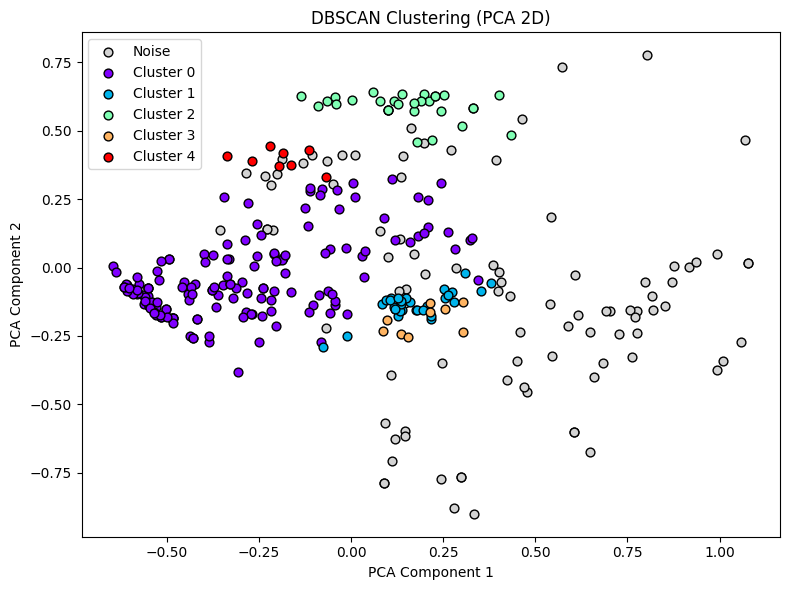

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df)

unique_labels = sorted(set(labels))
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
cmap = plt.cm.get_cmap('rainbow', n_clusters)

plt.figure(figsize=(8, 6))

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_reduced[class_member_mask]

    if k == -1:
        color = 'lightgray'
        label = 'Noise'
    else:
        color = cmap(k % 10)
        label = f'Cluster {k}'

    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label=label,
                s=40, edgecolors='k')

plt.title('DBSCAN Clustering (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()

## Hierarchi

### Menentukan jumlah cluster

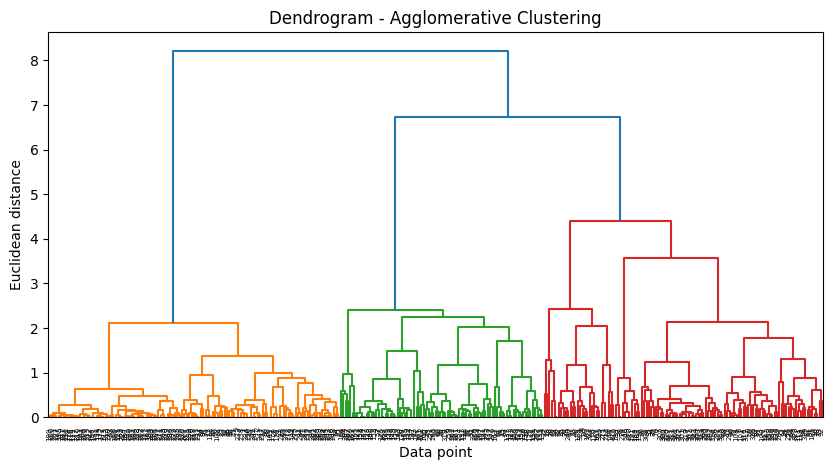

In [ ]:
import scipy.cluster.hierarchy as sch

df = np.array(df)
linked = sch.linkage(df, method='ward')

plt.figure(figsize=(10, 5))
sch.dendrogram(linked)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Data point')
plt.ylabel('Euclidean distance')
plt.grid(False)
plt.show()

Dari dendrogram tersebut, bisa diketahui jumlah cluster optimalnya adalah tiga (k =3) sebelum terjadi penggabungan cluster pada jarak yang terlalu besar. Dengan menggunakan nilai k tersebut, akan dilakukan clustering dengan mencari 3 cluster.

### Clustering

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agglo.fit_predict(df)
df['cluster'] = labels

n_clusters = len(set(labels))
print(f"Jumlah cluster: {n_clusters}")

if n_clusters >= 2:
    silhouette = silhouette_score(df, labels)
    dbi = davies_bouldin_score(df, labels)
    chi = calinski_harabasz_score(df, labels)

    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f} (lebih kecil lebih baik)")
    print(f"Calinski-Harabasz Index: {chi:.3f} (lebih besar lebih baik)")
else:
    print("Kurang dari 2 cluster, metrik evaluasi tidak dihitung.")

Jumlah cluster: 3
Silhouette Score: 0.618
Davies-Bouldin Index: 0.543 (lebih kecil lebih baik)
Calinski-Harabasz Index: 724.769 (lebih besar lebih baik)


### Visualisasi

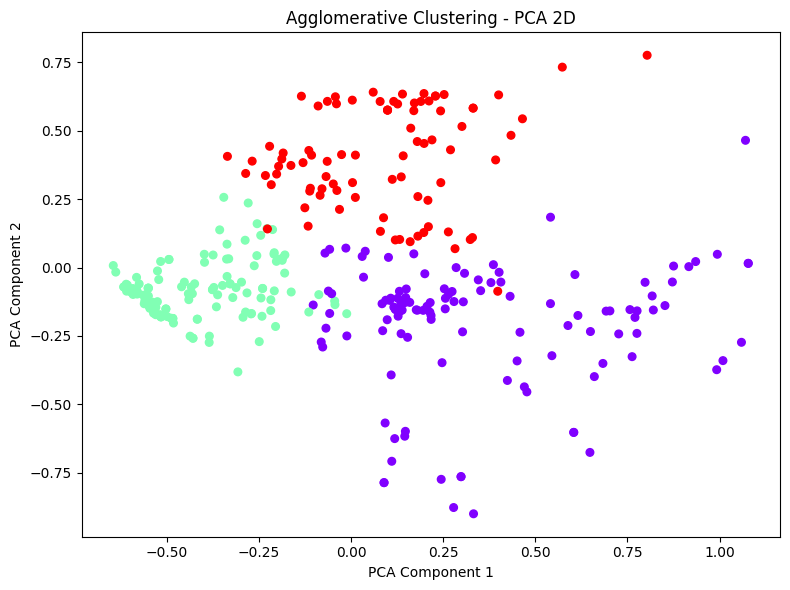

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='rainbow', s=30)
plt.title('Agglomerative Clustering - PCA 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(False)
plt.tight_layout()
plt.show()

## GMM

### Menentukan jumlah cluster

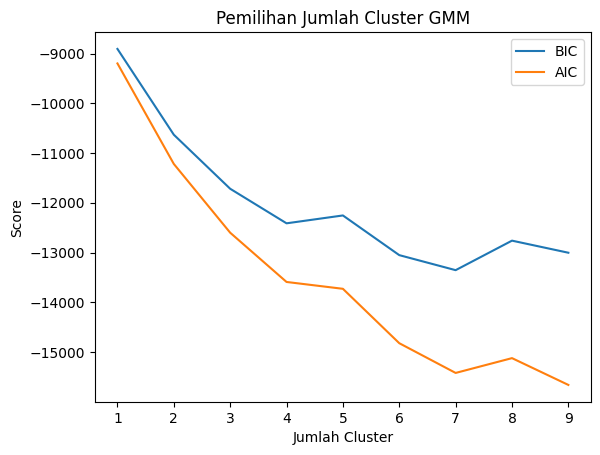

In [ ]:
bic_scores = []
aic_scores = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))
    aic_scores.append(gmm.aic(df))

plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Score')
plt.title('Pemilihan Jumlah Cluster GMM')
plt.legend()
plt.show()

Pada visualisasi tersebut, dapat diketahui bawah nilai k yang optimal adalah tiga (k = 3) dengan penurunan yang signifikan dari 3 ke 4. Setelah jumlah cluster ditentukan, maka akan dilakukan modeling menggunakan GMM.

### Clustering

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
labels = gmm.fit_predict(df)

n_clusters = len(set(labels))
print(f"Jumlah cluster: {n_clusters}")

if n_clusters >= 2:
    silhouette = silhouette_score(df, labels)
    dbi = davies_bouldin_score(df, labels)
    chi = calinski_harabasz_score(df, labels)

    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f} (lebih kecil lebih baik)")
    print(f"Calinski-Harabasz Index: {chi:.3f} (lebih besar lebih baik)")
else:
    print("Kurang dari 2 cluster, metrik evaluasi tidak dihitung.")

Jumlah cluster: 3
Silhouette Score: 0.238
Davies-Bouldin Index: 1.327 (lebih kecil lebih baik)
Calinski-Harabasz Index: 103.019 (lebih besar lebih baik)


### Visualisasi

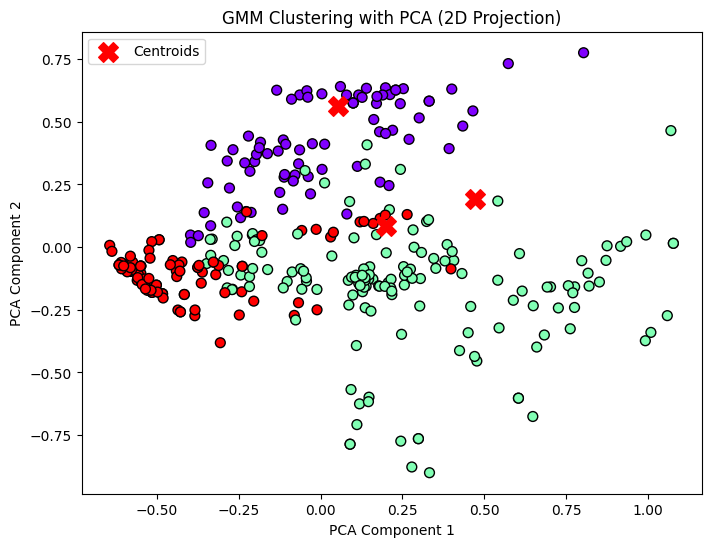

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
labels = gmm.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='rainbow', marker='o', edgecolor='k', s=50)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('GMM Clustering with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## Evaluasi

Dari seluruh metrik yang digunakan pada setiap model, Kmeans menjadi algoritma terbaik untuk dataset yang kita gunakan yaitu dataset mengenai jenis dan nutrisi pada makanan. <br>

Pada model, K-means menghasilkan clustering yang paling stabil dan menunjukkan pemisahan antar cluster yang jelas, hal ini dapat dilihat dari hasil clustering serta hasil metrik evaluasi K-means yang telah dibandingkan dengan keempat algoritma lainnya.<br>

Dilanjutkan dengan algoritma Hierarchical yang memberikan hasil yang lebih rendah dari K-means namun lebih tinggi daripada DBSCAN dan GMM, karena algoritma DBSCAN dan GMM merupakan algoritma dengan hasil performa terendah pada kasus dataset yang dimiliki.

<br>
Jadi dengan ini, diputuskan untuk menggunakan algoritma clustering berupa K-means.

# 5) Insight
Setelah membandingkan hasil metrik evaluasi dari keempat algoritma, maka diputusakan untuk menggunakan algoritma K-Means dengan jumlah 5 cluster, dikarenakan hasilnya yang paling optimal dan stabil.

## Analisis cluster

In [ ]:
print(df.describe())

       Karbohidrat     Protein      kalori       Lemak      Energi  \
count   327.000000  327.000000  327.000000  327.000000  327.000000   
mean      0.286782    0.249971    0.364716    0.182666    0.364803   
std       0.234715    0.234075    0.227657    0.184131    0.227688   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.101899    0.068825    0.181818    0.016193    0.181934   
50%       0.231118    0.181627    0.354724    0.134479    0.354921   
75%       0.481065    0.340512    0.495544    0.290976    0.495739   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

       lemak jenuh   kolestrol       serat        gula      sodium  \
count   327.000000  327.000000  327.000000  327.000000  327.000000   
mean      0.105860    0.036594    0.030760    0.120071    0.125931   
std       0.132896    0.083168    0.094242    0.184646    0.134351   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.005320 

In [ ]:
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

         Karbohidrat   Protein    kalori     Lemak    Energi  lemak jenuh  \
cluster                                                                     
0           0.043886  0.616227  0.386463  0.288581  0.386557     0.166952   
1           0.556472  0.213729  0.821114  0.549234  0.821296     0.309290   
2           0.457870  0.222240  0.469821  0.176671  0.469912     0.102463   
3           0.176921  0.083167  0.138875  0.044010  0.138929     0.024914   
4           0.740171  0.092381  0.516095  0.082857  0.516203     0.069490   

         kolestrol     serat      gula    sodium    kalium  
cluster                                                     
0         0.109448  0.024994  0.014564  0.173476  0.158114  
1         0.027040  0.026680  0.212580  0.196668  0.219573  
2         0.022983  0.038684  0.088872  0.186719  0.112625  
3         0.008177  0.029415  0.094213  0.050065  0.091838  
4         0.016569  0.032108  0.740107  0.028043  0.254722  


## Visualisasi

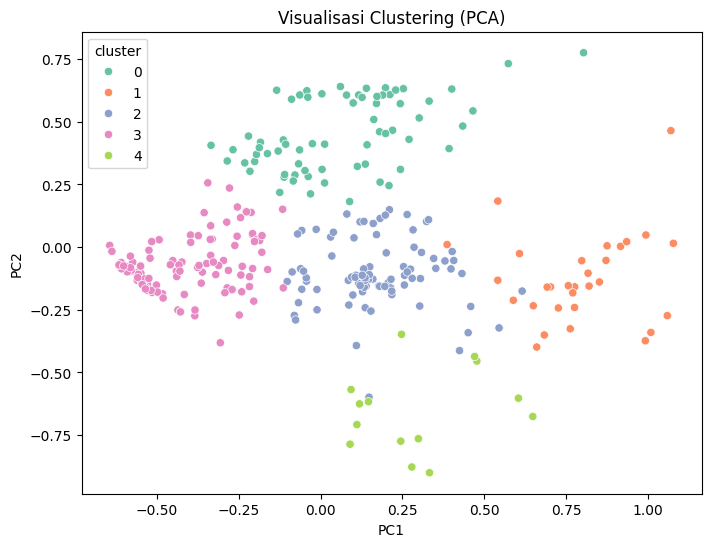

In [ ]:
pca =  PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['cluster']))

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title("Visualisasi Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca.components_, columns=df.drop(columns=['cluster']).columns, index=['PC1', 'PC2'])
print(pca_df.T)

                  PC1       PC2
Karbohidrat  0.332742 -0.578971
Protein      0.197003  0.631851
kalori       0.558575 -0.020819
Lemak        0.365210  0.227829
Energi       0.558651 -0.020815
lemak jenuh  0.211478  0.120041
kolestrol    0.014739  0.109260
serat        0.005523  0.008621
gula         0.097795 -0.413864
sodium       0.161186  0.121363
kalium       0.111725  0.018713


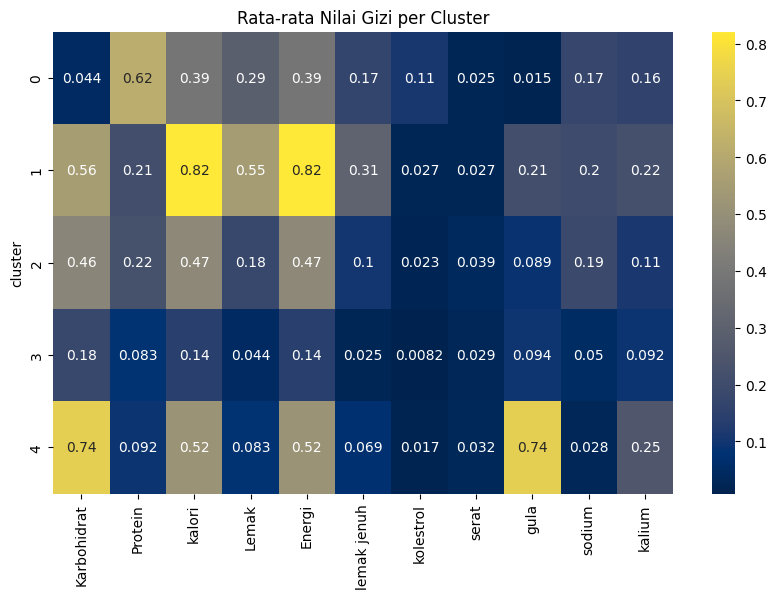

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="cividis")
plt.title("Rata-rata Nilai Gizi per Cluster")
plt.show()

5 kluster<br>
kluster 0 : tinggi protein; rendah karbo, serat, dan gula.<br>
kluster 1 : tinggi energi, kalori, dan lemak; rendah kolestrol, serat, dan sodium.<br>
kluster 2 : tinggi karbo, kalori, dan energi; rendah lemak jenuh, kolestrol, serat, dan gula.<br>
kluster 3 : tinggi karbo, protein, kalori; rendah lemak dan lemak jenuh.<br>
kluster 4 : tinggi gula dan karbo; rendah protein, lemak, dan sodium.

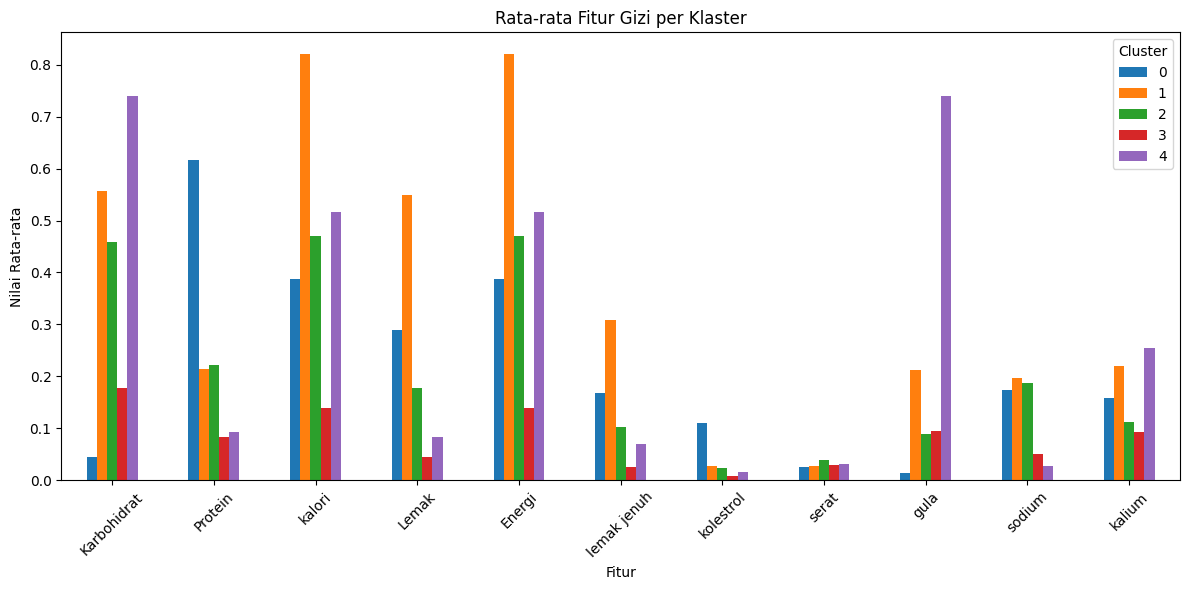

In [ ]:
mean_per_cluster = df.groupby('cluster').mean()

mean_per_cluster.T.plot(kind='bar', figsize=(12,6))
plt.title("Rata-rata Fitur Gizi per Klaster")
plt.ylabel("Nilai Rata-rata")
plt.xlabel("Fitur")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

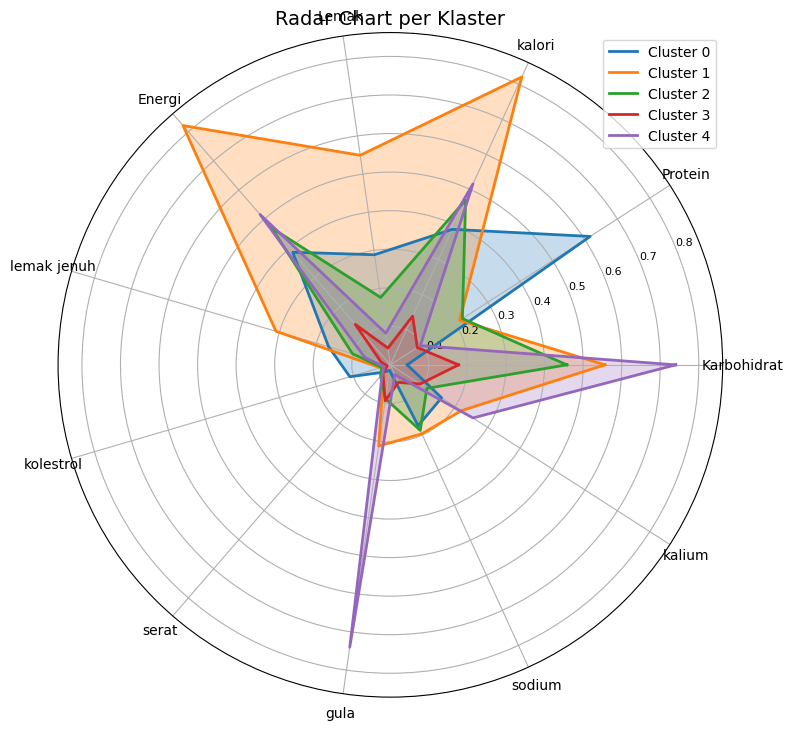

In [ ]:
def plot_radar(data, cluster_labels):
    labels = data.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    for idx, row in enumerate(data.values):
        values = row.tolist()
        values += values[:1]
        plt.polar(angles, values, label=f"Cluster {cluster_labels[idx]}", linewidth=2)
        plt.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], labels, fontsize=10)
    plt.yticks(fontsize=8)
    plt.title("Radar Chart per Klaster", fontsize=14)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

plot_radar(mean_per_cluster, mean_per_cluster.index)

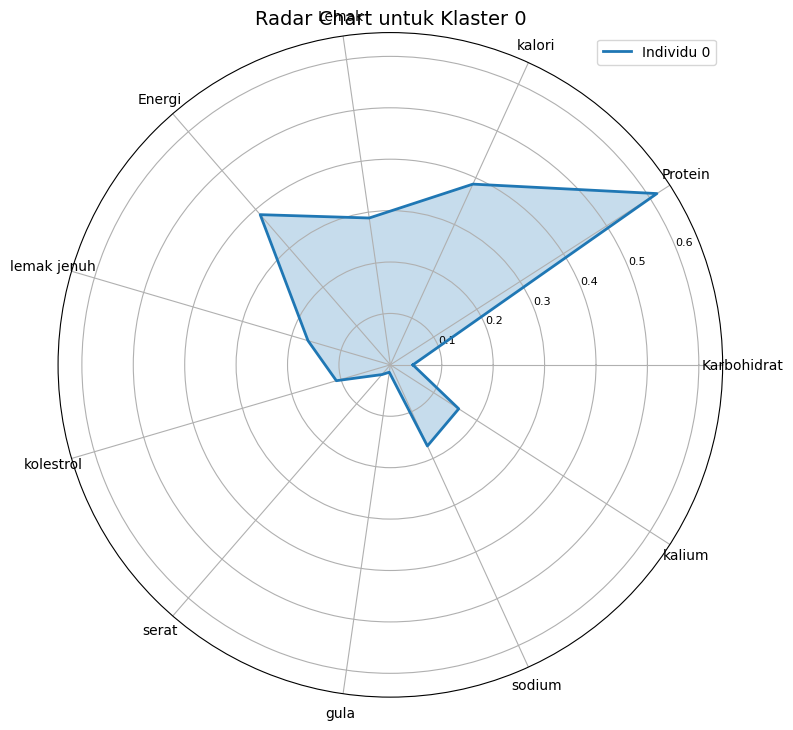

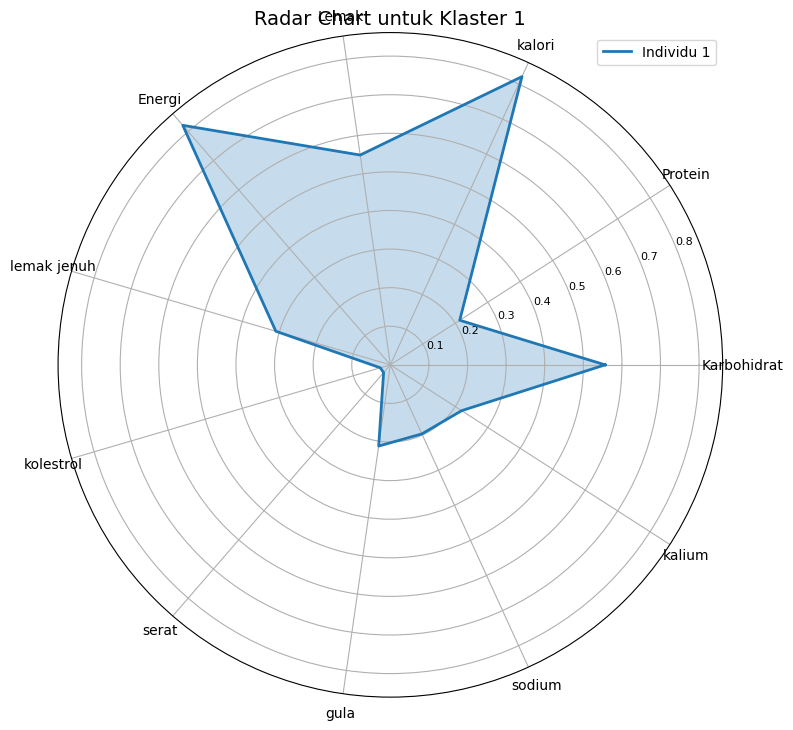

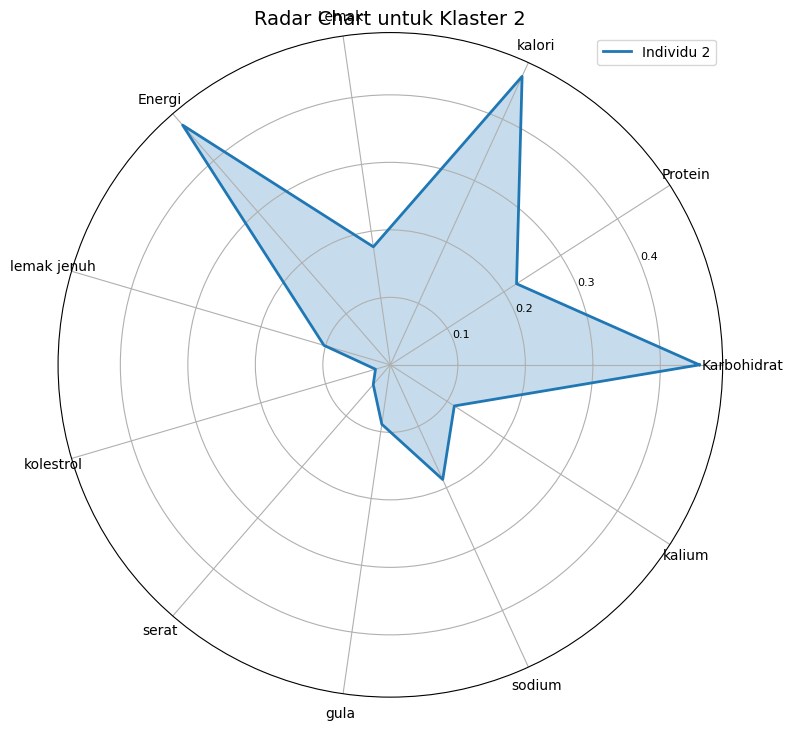

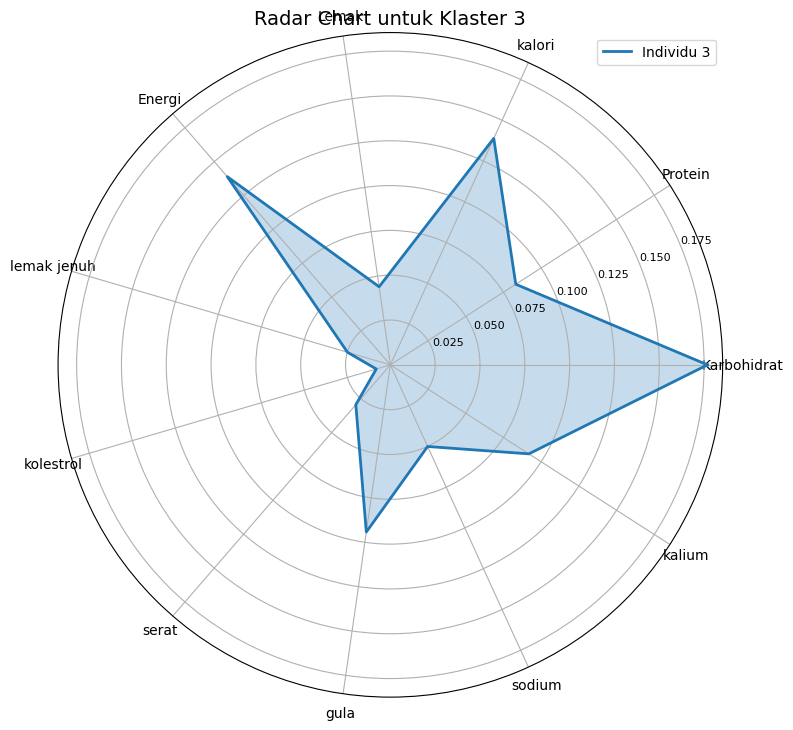

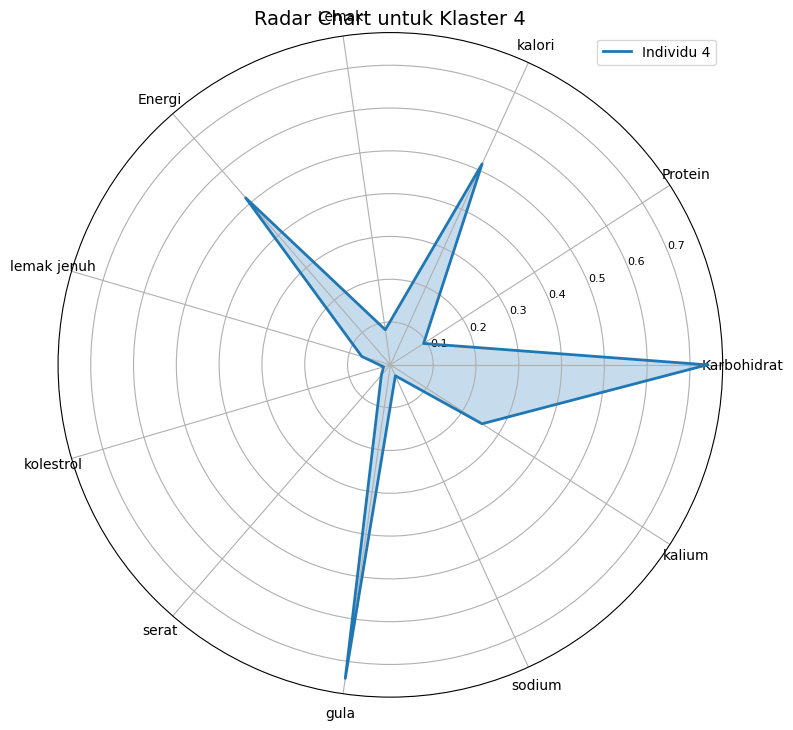

In [ ]:
def plot_radar_separate(data, cluster_labels):
    labels = data.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        plt.figure(figsize=(8, 8))
        cluster_data = data[cluster_labels == label]

        for idx, row in cluster_data.iterrows():
            values = row.tolist()
            values += values[:1]
            plt.polar(angles, values, label=f"Individu {idx}", linewidth=2)
            plt.fill(angles, values, alpha=0.25)

        plt.xticks(angles[:-1], labels, fontsize=10)
        plt.yticks(fontsize=8)
        plt.title(f"Radar Chart untuk Klaster {label}", fontsize=14)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

plot_radar_separate(mean_per_cluster, mean_per_cluster.index)

In [ ]:
df["cluster"].value_counts()

,count
cluster,
3,121
2,86
0,72
1,31
4,17


- Cluster 0 (Lauk pauk tinggi protein)<br>
Pada cluster ini diketahui bahwa kandungan nutrisi dengan nilai tertinggi yang ada pada setiap makanan adalah kandungan protein dengan nilai 0.62 dan nilai terendah ada pada kandungan gula yaitu 0.015. Jenis makanan pada cluster ini  merupakan makanan yang kaya protein namun rendah kandungan karbohidrat, gula, dan serat, biasanya jenis makanan dengan kandungan nutrisi ini adalah lauk pauk seperti ayam, telur, daging, tahu, dan tempe.

- Cluster 1 (Cemilan ringan tinggi energi)<br>
Pada cluster 1 kandungan nutrisi tertinggi ada pada kalori dan energi dengan nilai 0.82, didukung dengan kandungan karbohidrat dan lemak dengan nilai 0,56 dan 0,55. Dan kandungan terendah pada cluster ini adalah kolesterol dan serat dengan nilai 0.027. Makanan pada cluster ini isinya adalah cemilan ringan yang memiliki kandungan energi yang tinggi seperti keripik kentang dan jagung, donat, kue, wafer, kacang almond, bolu, dan popcorn.

- Cluster 2 (Cemilan berat energi sedang)<br>
Pada cluster 2 kandungan nutrisi tertinggi ada pada karbohidrat, kalori, dan energi dengan nilai 0.46 dan 0.47, sedangkan rendah pada kolestrol, serat, dan gula. Makanan pada cluster ini isinya adalah cemilan berat tetapi memiliki proprosi yang cukup rata dikarenakan termasuk makanan olahan seperti roti, pizza, risol, eskrim.

- Cluster 3 (Makanan seimbang rendah lemak)<br>
Pada cluster 3 kandungan nutrisi tergolong rata pada setiap aspek. Hal tersebut dikarenakan makanan dikelompok ini merupakan makanan yang seimbang dan merupakan makanan yang dikonsumsi untuk mencukupi kebutuhan gizi, seperti nasi, mie, pasta, oatmeal, dan salad.

- Cluster 4 (Cemilan ringan manis tinggi gula)<br>
Pada cluster 4 kandungan nutrisi tertinggi ada pada karbohidrat dan gula dengan nilai 0.74, dan kandungan terendah pada cluster ini adalah protein, lemak, dan sodium. Makanan pada cluster ini isinya adalah makanan ringan yang manis seperti buah-buahan kering, brownis, macaron, permen, dan kismis.